## Generating audio signals with custom parameters

As we mentioned earlier, audio sianls are complex mixtures of sinusoid. So we will gerate auido signals based on this sinusoid parameters. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [9]:
# output file
output_file = 'output_signal.wav'

We want to generate signal with a sampling frequency of 44111 (*human sound requency*) and a tonal frequency of *587 Hz*. The siganl's bond values on the time axsi $\in \left \{ -2\pi, 2\pi \right \}$

In [22]:
# specify audio parameters
duration = 3 # input aduio is 3 seconds long
sampling_freq = 44100 # Hz
tone_freq = 587 # Hz
min_val = -2 * np.pi
max_val = 2 * np.pi

In [23]:
# generate sinusoid signal and noise
t = np.linspace(min_val, max_val, duration * sampling_freq)
audio = np.sin(2 * np.pi * tone_freq * t)
noise = 0.4 * np.random.rand(duration * sampling_freq)
audio += noise

In [24]:
# sacale it to 16-bit integer values
scaling_factor = pow(2,15) - 1
audio_normalized = audio / np.max(np.abs(audio))
audio_scaled = np.int16(audio_normalized * scaling_factor)

In [25]:
# write to output file 
write(output_file, sampling_freq, audio_scaled)

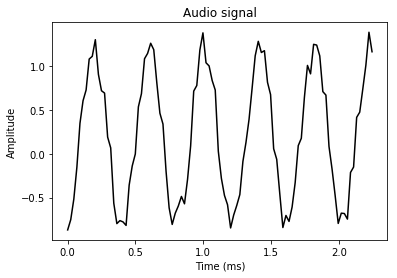

In [26]:
# extract first 100 values for plotting
audio = audio[:100]
# build the histogram
x_values = np.arange(0, len(audio), 1) / float(sampling_freq)
# convert to second
x_values *= 1000
# polt the signal
plt.plot(x_values, audio, color='black')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Audio signal')
plt.show()